In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import koreanize_matplotlib

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/hotel_review_75000.csv', encoding='utf-8')
data

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True
...,...,...,...,...,...,...,...,...,...,...
74995,74995,223914,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 17일,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,True
74996,74996,223915,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,2박 로맨틱 여행,2018년 11월 30일,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,True
74997,74997,223916,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 12월 4일,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,True
74998,74998,223917,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 5월 2일,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,True


In [3]:
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotelId       75000 non-null  int64  
 1   hotelName     75000 non-null  object 
 2   tripType      75000 non-null  object 
 3   tripTypeText  75000 non-null  object 
 4   reviewDate    75000 non-null  object 
 5   rating        75000 non-null  float64
 6   description   75000 non-null  object 
 7   isKorNot      75000 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 4.1+ MB


In [5]:
stopwords = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/%ED%95%9C%EA%B5%AD%EC%96%B4%EB%B6%88%EC%9A%A9%EC%96%B4100.txt', header = None)
stopwords

,0
0,이
1,있
2,하
3,것
4,들
...,...
104,원
105,잘
106,통하
107,소리


In [6]:
list(stopwords[0])

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '왜',
 '뭐',
 '거',
 '해',
 '저',
 '너',
 '건',
 '은',
 '걸',
 '진짜',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓']

In [7]:
data.columns

Index(['hotelId', 'hotelName', 'tripType', 'tripTypeText', 'reviewDate',
       'rating', 'description', 'isKorNot'],
      dtype='object')

In [8]:
data = data[['rating', 'description']]
data

,rating,description
0,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3,10.0,가격에 맞게 만족했습니다
4,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
...,...,...
74995,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...
74996,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...
74998,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...


In [9]:
data['rating'].value_counts()

rating
10.0    34103
8.0     24283
6.0      8877
4.0      4278
2.0      3459
Name: count, dtype: int64

In [10]:
# 특수문자 있는지 확인
for i in data['description'][100:200] :
    print(i)

고층에 묵어야 시티뷰가 잘 보일 것 같아요
조식 식사시  직원들이 옆 테이블 정비를 너무 시끄럽게 해서 식사가 매우 힘들었음
호텔은 깨끗하고 아늑했음 투숙객이 많았던 것에 비해 잘 컨트롤되고 있다는 느낌을 받았음 다시 숙박할 용의있음
상당히 만족스러운 숙박이었습니다와이프와 기념일이라 많이 배려해주신것도 좋았고아기침대 아기욕조 가습기까지 챙겨주신것도 좋았습니다감사합니다
좋았읍니다
조식이랑 바는 음식들이 별로에요 복잡하고 종류도없네요
우선 직원들 서비스는 너무 좋았어요침구도 푹신했고요다만 수영장에서 수영모랑 물안경 분실관련해서 응대가 쫌 그랬어요 참 최근에 숙박한 다른분들 보면 생일방문시 와인 or 기념품 or 늦은 체크아웃있던데 그런 혜택이 없어서 아쉬웠어요 조선델리에서 바나케익 샀는데 예전보다 맛이 좀 아쉬워요
전반적인 서비스에 매우 만족했습니다 다음에도 방문하고 싶어요
흠 라운지 사용인원이 많아서 칵테일아워를 오키드룸에서도 진행했는데 너무 음침하고 분위기가 안 좋았어요  음식은 좋았는데 걍 라운지에서 먹을 걸 후회했어요
모든 직원들이 무척 친절합니다 호텔 자체가 오래되긴 했지만 객실은 깨끗합니다 조식 뷔페도 아주 굿굿
침대가 생각보다 작았네요 아들 9살인데 여튼 킹싸이즈침대는 좀작았네요
친절하셨고 깨끗해서 다음에 또 이용하고 싶습니다
사람들이 많았는데 라운지 음식도 바로바로 채워주는 것도 아니였습니다 시간대를 잘 분배해서 해줬으면 좋았을 텐데요
너무 친절하고 좋았습니다 다음에 다시 방문할꺼에요
5성급이라 그런지 서비스가 훌륭합니다모든 직원분들이 친절하시고 객실상태도 최고입니다저녁엔 아리아 이용했고 조식도 이용했는데메뉴가 엄청 다양하진 않지만 맛이 너무 좋았습니다다만 지하주차장 입출구가 조금 좁습니다초보운전자들은 주의하셔야 할듯합니다
수영장과 사우나 헬스장이 정말 쾌적하고 자유로움 강추입다
체크인때 주차부터 모든 직원분들이 친절하셨고 쾌적하게 잘 지내고 왔습니다
오래된 호텔이었지만 호텔컨디션 괜찮구요 이그제큐티브층 이용했는데 음식 서비스 모두 만족합니다
서비스

In [11]:
whole_words = []
for i in data['description'] :
    for word in i.split(' ') :
        whole_words.append(word)
whole_words[:30]

['직원들',
 '서비스나',
 '마인드',
 '완벽합니다',
 '다만',
 '노후된',
 '시설과',
 '좁은',
 '라운지가',
 '호텔',
 '이름에',
 '비해',
 '약간',
 '부족합니다',
 '웨스틴조선은',
 '모든면에서',
 '최고의',
 '숙소라고',
 '생각합니다',
 '분위기',
 '편의성',
 '직원친절도까지',
 '모두',
 '인상적이었습니다',
 '서울시내에서',
 '호캉스를',
 '누릴',
 '수',
 '있는',
 '곳아침']

In [12]:
from nltk.probability import FreqDist
# 빈도수 확인
FreqDist(whole_words)

FreqDist({'': 20302, '너무': 13917, '잘': 8725, '좋았습니다': 8114, '좀': 7608, '깨끗하고': 7594, '있어서': 5728, '수': 5698, '매우': 5617, '좋았어요': 5335, ...})

<Axes: xlabel='Samples', ylabel='Counts'>

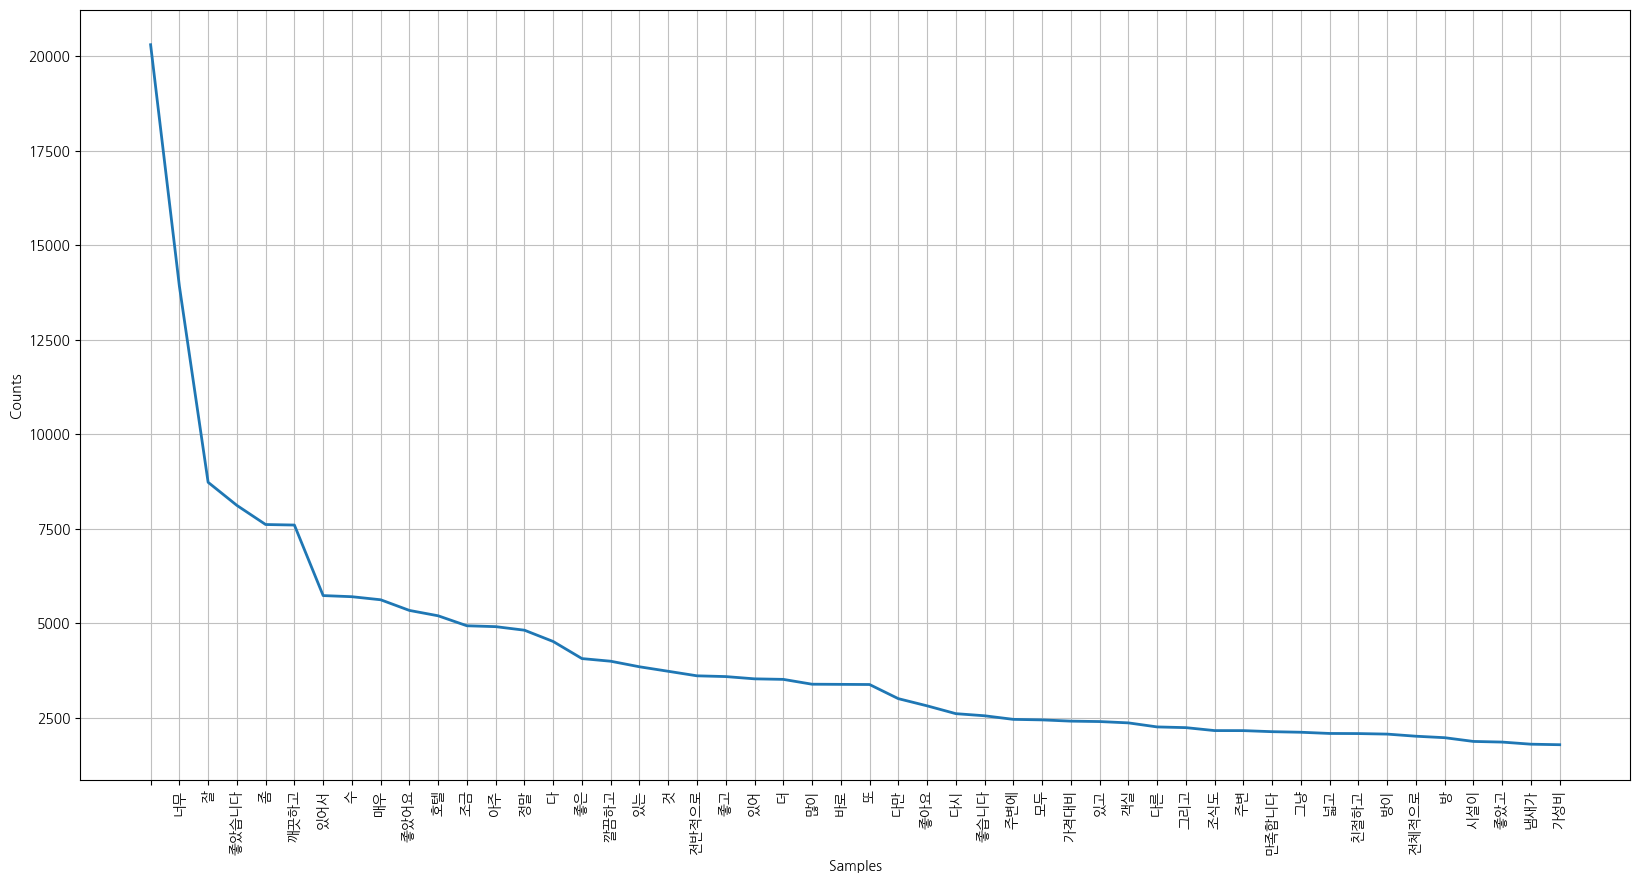

In [13]:
# 빈도수 그래프 그리기(50개만)
plt.figure(figsize = (20, 10))
FreqDist(whole_words).plot(50)

### 워드클라우드 만들기

In [14]:
from wordcloud import WordCloud

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

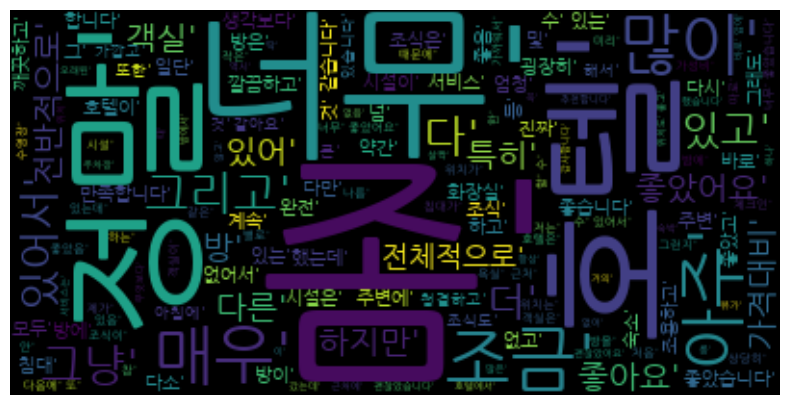

In [15]:
# wordcloud = WordCloud(font_path=koreanize_matplotlib.get_font_path()).generate(text)
wc = WordCloud(font_path = '/user/share/fonts/truetype/nanum/NanumGothic.ttf').generate(str(whole_words))
plt.figure(figsize = (10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

### 평점 별로 텍스트 나눠서 각각 워드클라우드 만들어보기

In [16]:
data[data['rating'] == 8.0]

,rating,description
13,8.0,주니어스위트로 더블싱글침대가 있어 모두 편히 잠을 잘 수있었습니다 바로 시청앞 스케...
18,8.0,직원 친절하고 시설 좋았음
21,8.0,조선호텔은 처음 숙박하는데 듣던대로 직원분들의 서비스는 좋았습니다 연휴라 사람이 많...
33,8.0,인테리어는 오래된 호텔이라 특별히 좋거나 세련되지는 않았지만 스위트룸 객실이 다른 ...
37,8.0,따뜻한 느낌의 서비스
...,...,...
74989,8.0,설악산이근처에있고 작지만시설도 괜찮았고 만족한여행이었습니다
74993,8.0,ㆍ새로 지은 호텔이라 전반적 상태는 좋아요ㆍ옆에 고층건물이 올라와서 오션뷰는 오션뷰...
74996,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...


In [17]:
for i in data[data['rating'] == 8.0]['description'][:40] :
    print(i)

주니어스위트로 더블싱글침대가 있어 모두 편히 잠을 잘 수있었습니다 바로 시청앞 스케이트장이 보여 뷰도 상당히 좋았고요 직원분들 격하게 친절하셔서 기분좋았네요 사우나가 완전 좋았어요
직원 친절하고 시설 좋았음
조선호텔은 처음 숙박하는데 듣던대로 직원분들의 서비스는 좋았습니다 연휴라 사람이 많아서 그런지 환구단뷰 요청에도 받지 못해서 다소 아쉬웠는데  끝방으로 주셔서 조용히 잘 묵었습니다 그리고 칵테일아워 음식이 조식보다 못해서 좀 아쉬운점 정도 있습니다
인테리어는 오래된 호텔이라 특별히 좋거나 세련되지는 않았지만 스위트룸 객실이 다른 호텔의 스위트보다  조금 넓은 것 같아서 편안했습니다 주변에 롯데백화점도 있고 상권이 발달하여 위치적으로도 편리했어요
따뜻한 느낌의 서비스
침구관리 잘 되어있어 좋았구요 평판만큼 조식은 그저그랬어요광장 집회로 호텔진입로가 막히면 프론트 직원들이 상황을 잘 전달받아 우회도로 안내정도는 좀 해주실 수 있으면 좋겠네요
위치가 좋네요 조식도 훌륭한 편입니다
전체적으로 좋은컨디션이였음
시설도 깨끗하고 좋았습니다 특히 사정이 있어 저녁시간에 와인을 마시러 못갔었는데 들어와보니 와인과 과일이 있어서 놀랐습니다 사소한것 하나하나 신경써주셔서 감사합니다
서울시청역이랑 가깝고 같은 한국인으로써 자부심느낄정도로 직원분들이 정말정말 친절하고 세심하세요 시설 안내해주시는것도 꼼꼼히 챙겨주시고 너무 좋은 여름 휴가 보냈습니다 아쉬운점이 있다면 화장실 문이 고장났는데 안잠겨서 당황했고 옷장안에 그을림 자국같은 것이 있어서 청소가 조금 덜되지 않았나 싶습니다그래도 너무너무 좋았어요  다음에 또 묵고 싶어요
숙박은 좋았으나 사우나 비용이 너무 비싼 것 같습니다
위치를 비롯해서 대부분 만족해요
편하게 잘 쉬다가 왔습니다
공기가 탁했어요 방에서도 조식시간이나 저녁시간에 음식 냄새가 들어오기도하고 먼가 공기가 쾌쾌한 것 같았어요 나머지는 서비스는 너무너무 괜찮았습니다
청소를 좀 깔끔히 해주셨으면 합니다
대체적으로 만족합니다 한가지채크인이몰려 대기시간이너무 길었습니다 

In [18]:
data['evaluation'] = 0

In [19]:
data.loc[(data['rating'] == 6.0) | (data['rating'] == 4.0) | (data['rating'] == 2.0), 'evaluation'] = 0

In [20]:
data.loc[(data['rating'] == 10.0) | (data['rating'] == 8.0), 'evaluation'] = 1

In [21]:
data

,rating,description,evaluation
0,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,1
1,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,1
2,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,1
3,10.0,가격에 맞게 만족했습니다,1
4,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,1
...,...,...,...
74995,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,1
74996,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,1
74997,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,1
74998,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,1


In [42]:
ten = data.loc[data['rating'] == 10.0, 'description']
two = data.loc[data['rating'] == 2.0, 'description']
eight = data.loc[data['rating'] == 8.0, 'description']
six = data.loc[data['rating'] == 6.0, 'description']
four = data.loc[data['rating'] == 4.0, 'description']

In [43]:
ten_text = " ".join(list(ten))
two_text = " ".join(list(two))
eight_text = " ".join(list(eight))
six_text = " ".join(list(six))
four_text = " ".join(list(four))

In [90]:
ten_words = []
for i in ten :
    for word in i.split(' ') :
        ten_words.append(word)
two_words = []
for i in two :
    for word in i.split(' ') :
        two_words.append(word)
eight_words = []
for i in eight :
    for word in i.split(' ') :
        eight_words.append(word)
six_words = []
for i in six :
    for word in i.split(' ') :
        six_words.append(word)
four_words = []
for i in four :
    for word in i.split(' ') :
        four_words.append(word)

### 10점

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

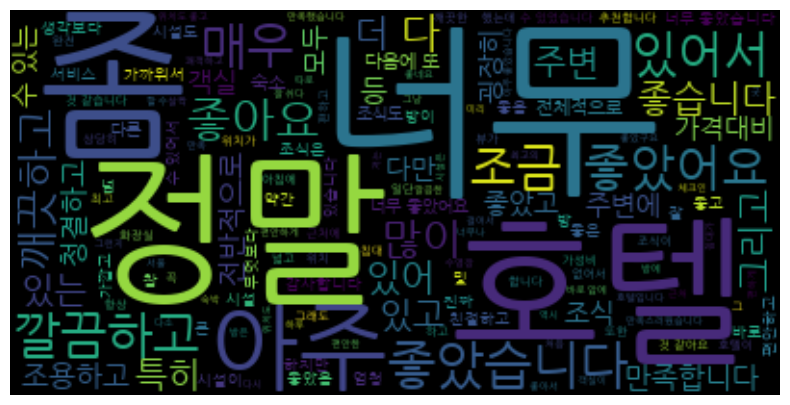

In [44]:
wc = WordCloud(font_path = '/user/share/fonts/truetype/nanum/NanumGothic.ttf').generate(str(ten_text))
plt.figure(figsize = (10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

<Axes: xlabel='Samples', ylabel='Counts'>

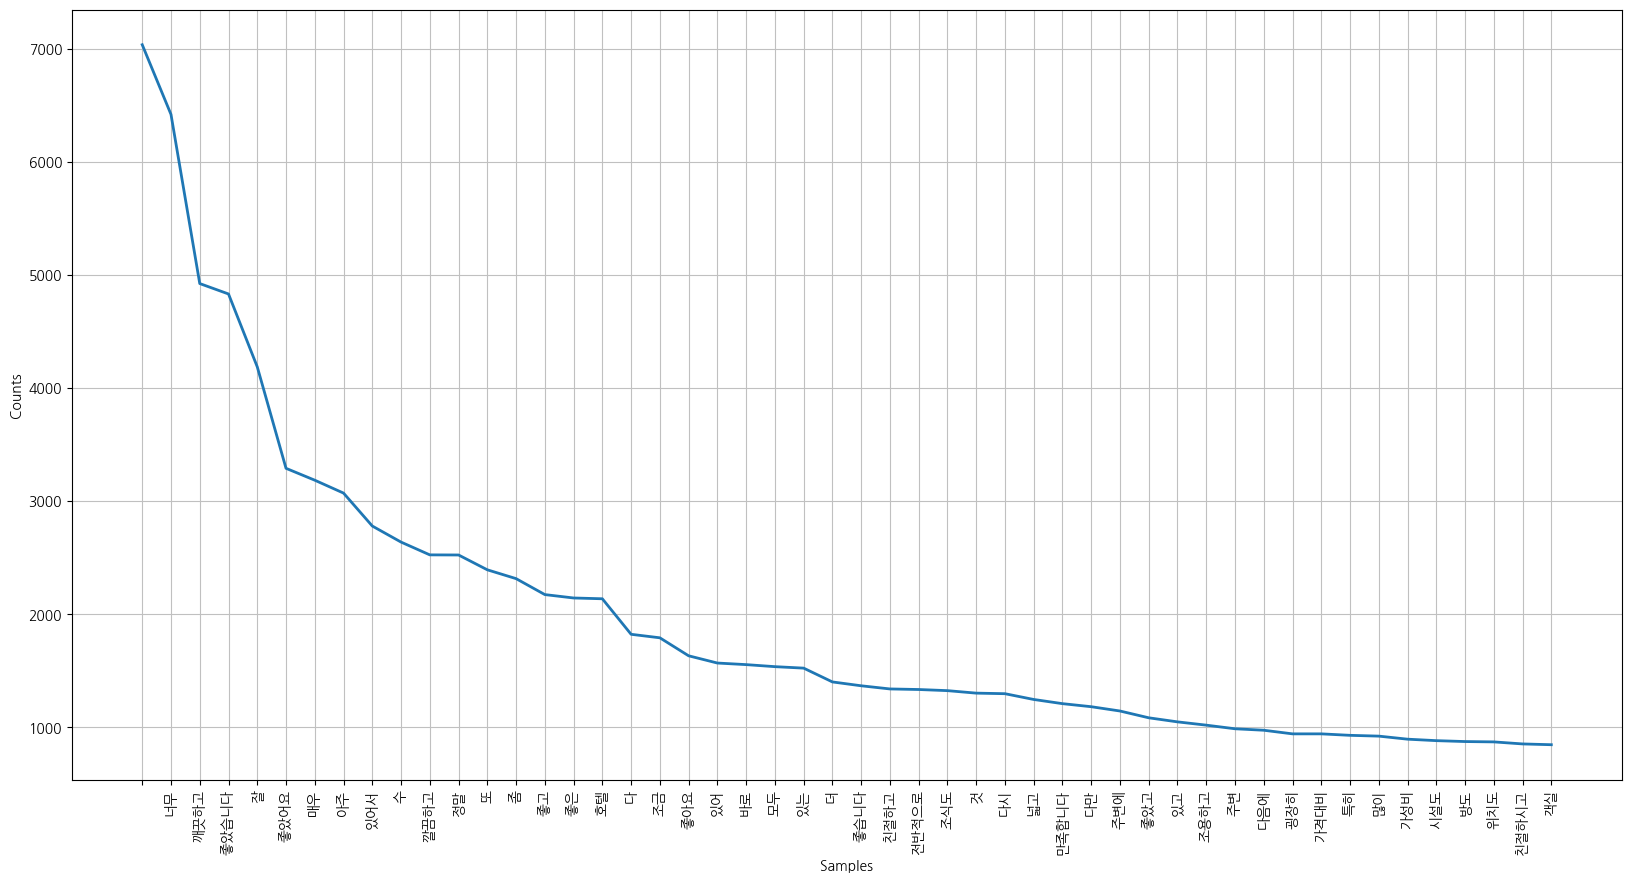

In [91]:
plt.figure(figsize = (20, 10))
FreqDist(ten_words).plot(50)

### 2점

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

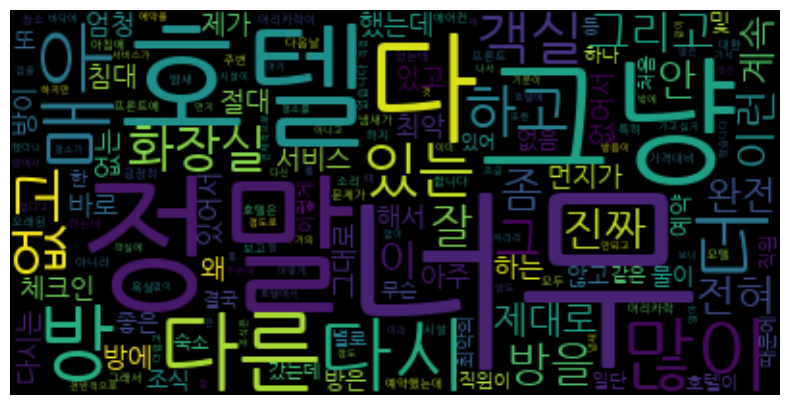

In [45]:
wc = WordCloud(font_path = '/user/share/fonts/truetype/nanum/NanumGothic.ttf').generate(str(two_text))
plt.figure(figsize = (10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

<Axes: xlabel='Samples', ylabel='Counts'>

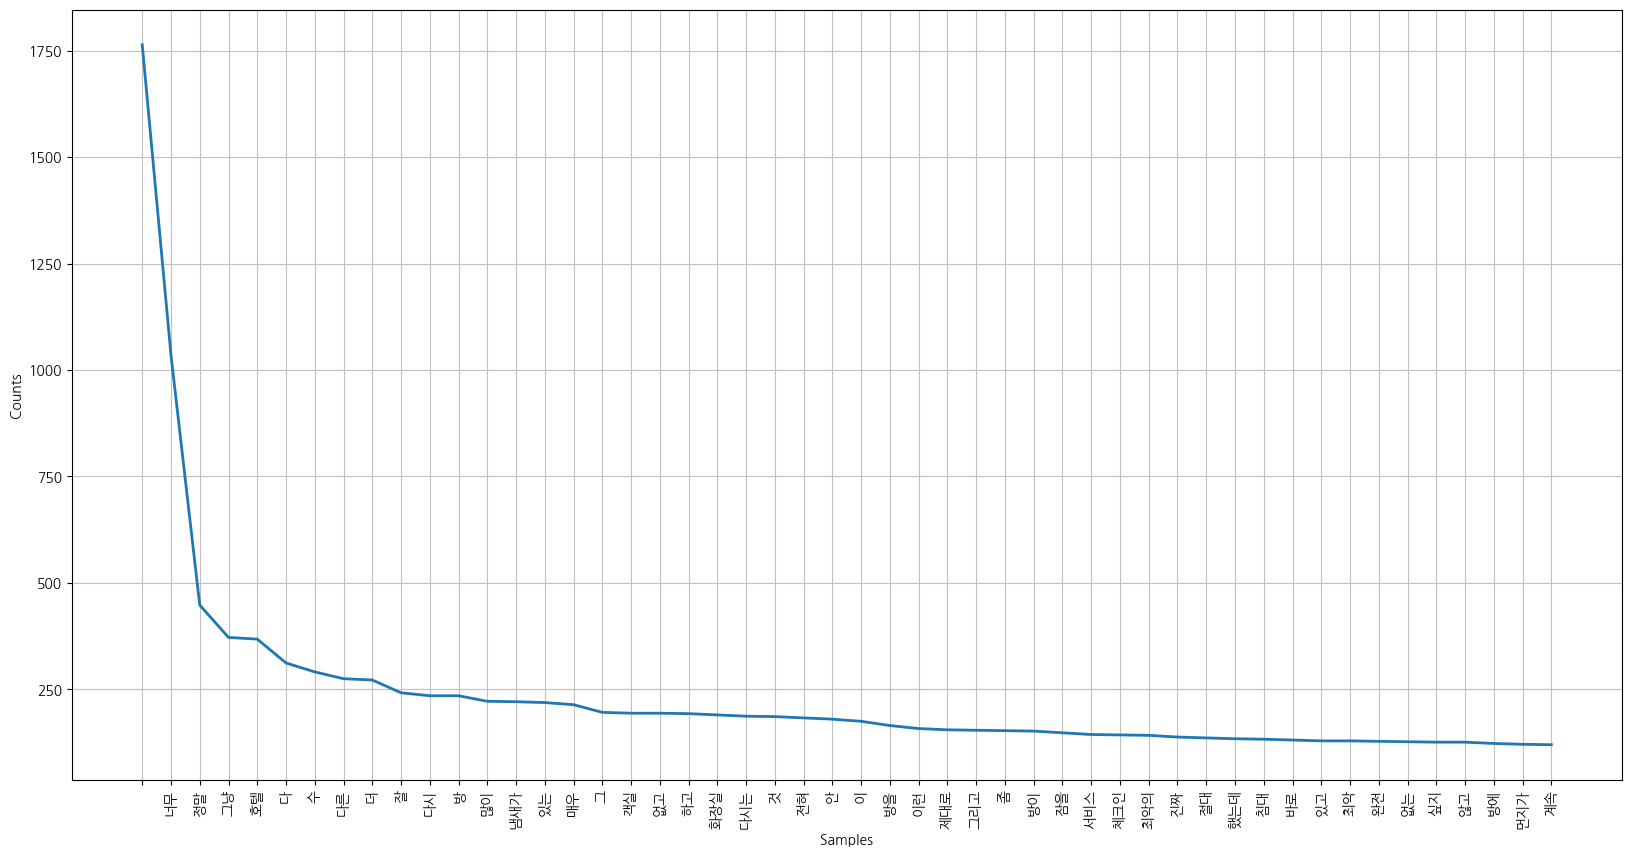

In [92]:
plt.figure(figsize = (20, 10))
FreqDist(two_words).plot(50)

### 8점

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

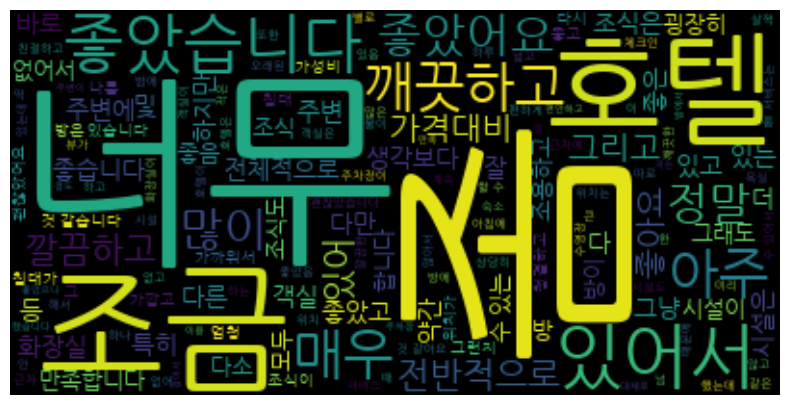

In [46]:
wc = WordCloud(font_path = '/user/share/fonts/truetype/nanum/NanumGothic.ttf').generate(str(eight_text))
plt.figure(figsize = (10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

<Axes: xlabel='Samples', ylabel='Counts'>

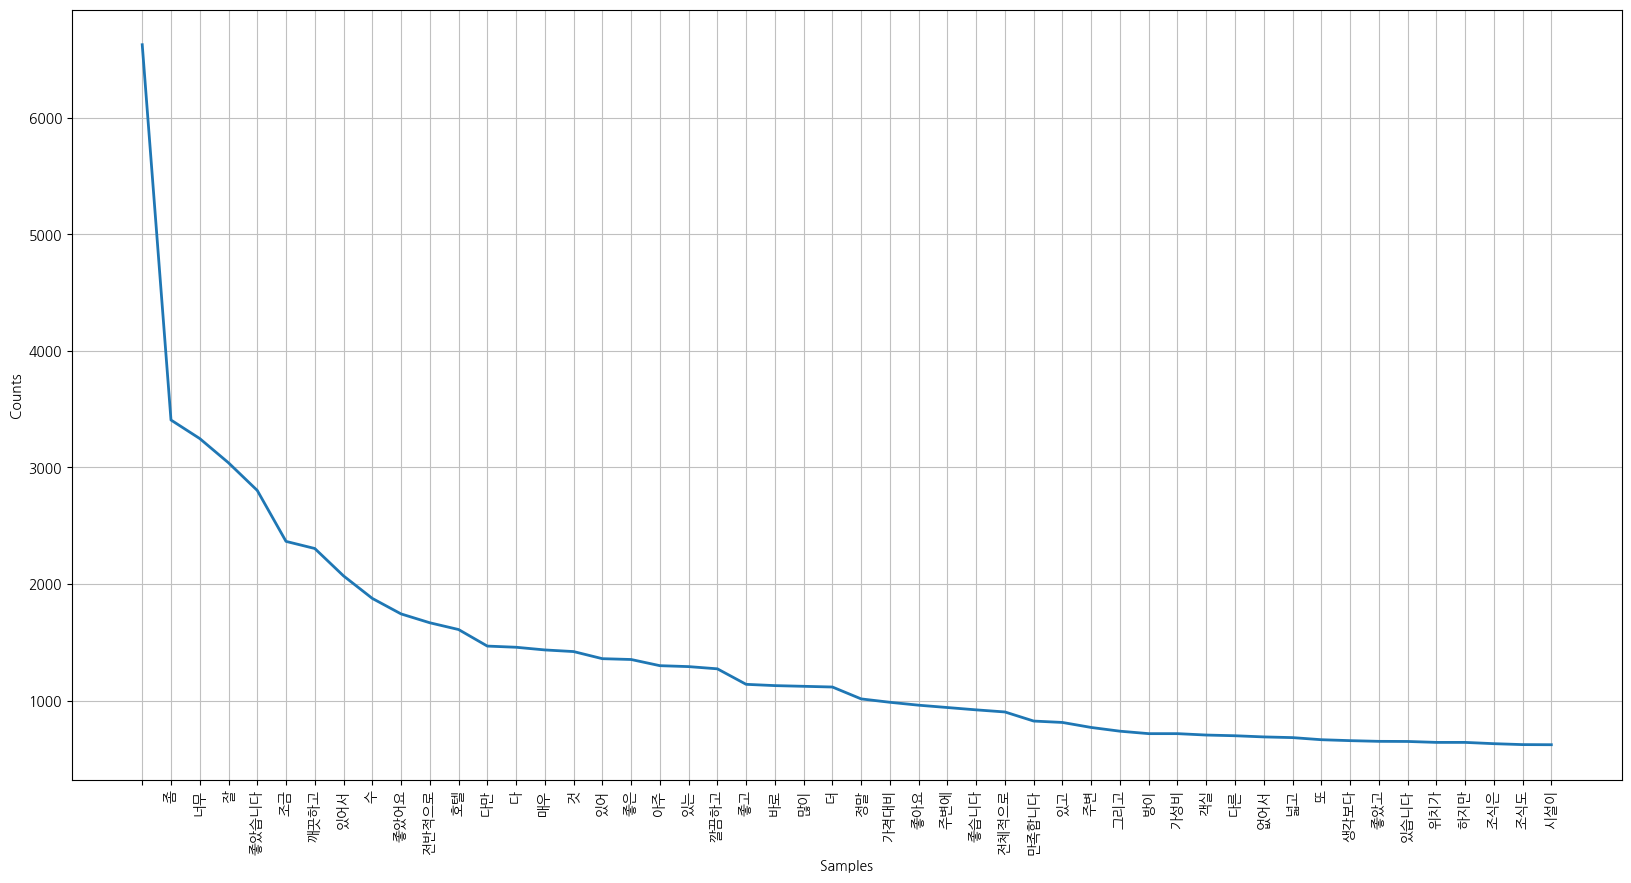

In [57]:
plt.figure(figsize = (20, 10))
FreqDist(eight_words).plot(50)

### 6점

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

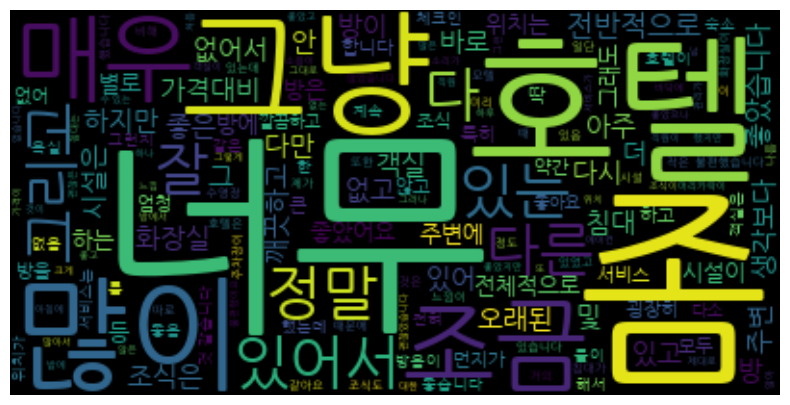

In [47]:
wc = WordCloud(font_path = '/user/share/fonts/truetype/nanum/NanumGothic.ttf').generate(str(six_text))
plt.figure(figsize = (10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

<Axes: xlabel='Samples', ylabel='Counts'>

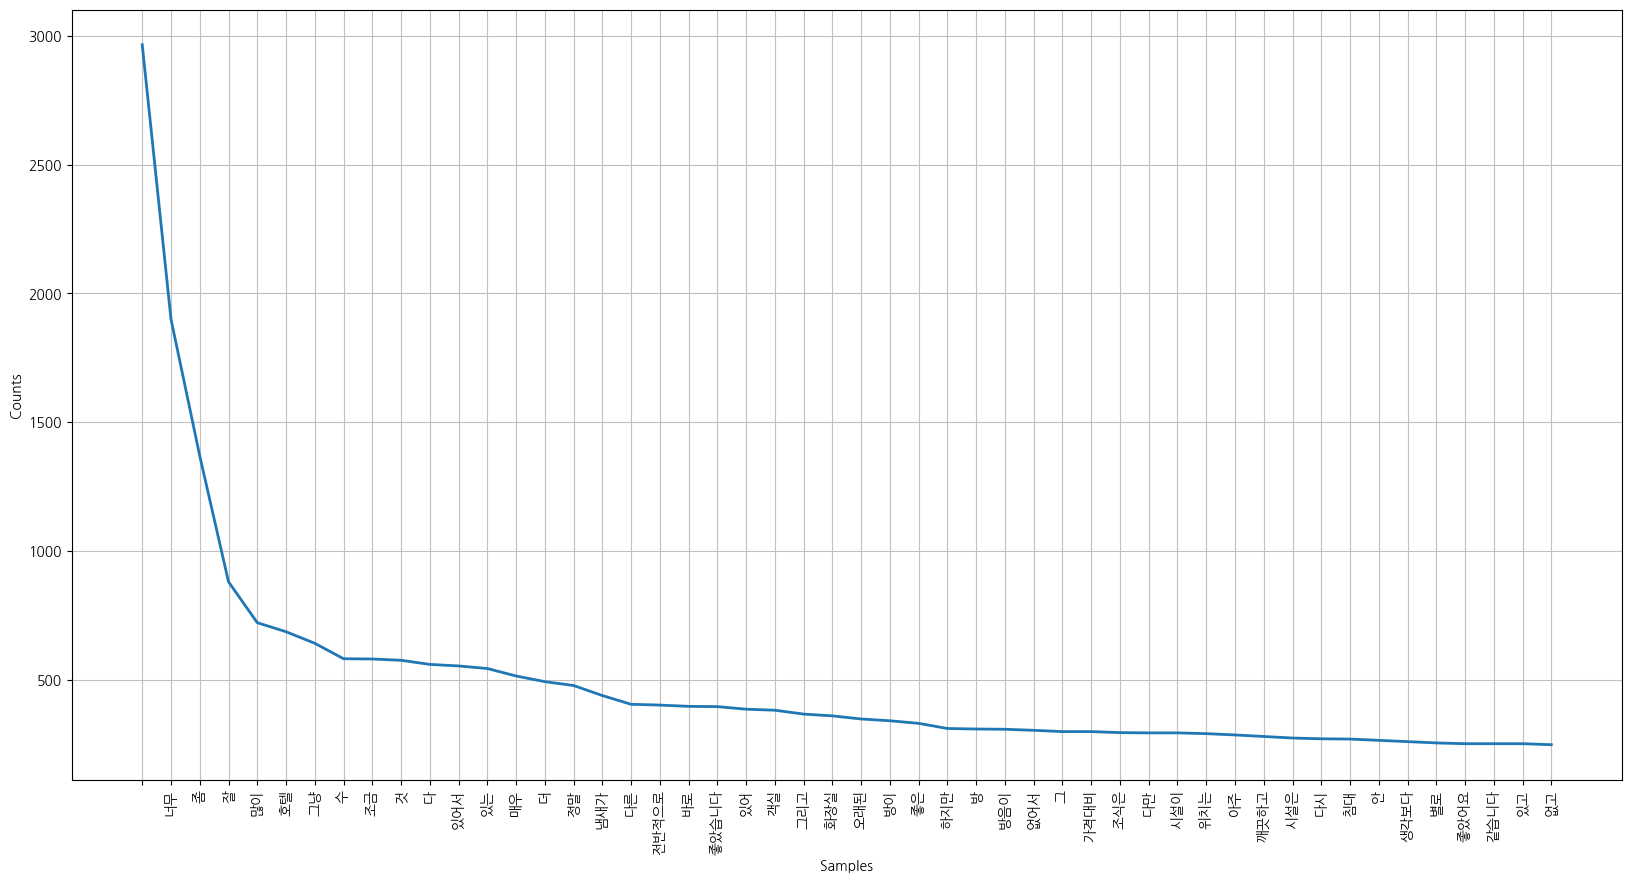

In [58]:
plt.figure(figsize = (20, 10))
FreqDist(six_words).plot(50)

### 4점

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

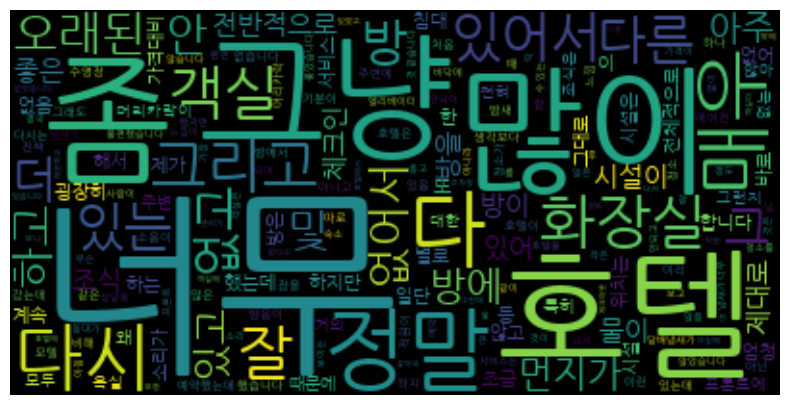

In [48]:
wc = WordCloud(font_path = '/user/share/fonts/truetype/nanum/NanumGothic.ttf').generate(str(four_text))
plt.figure(figsize = (10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

<Axes: xlabel='Samples', ylabel='Counts'>

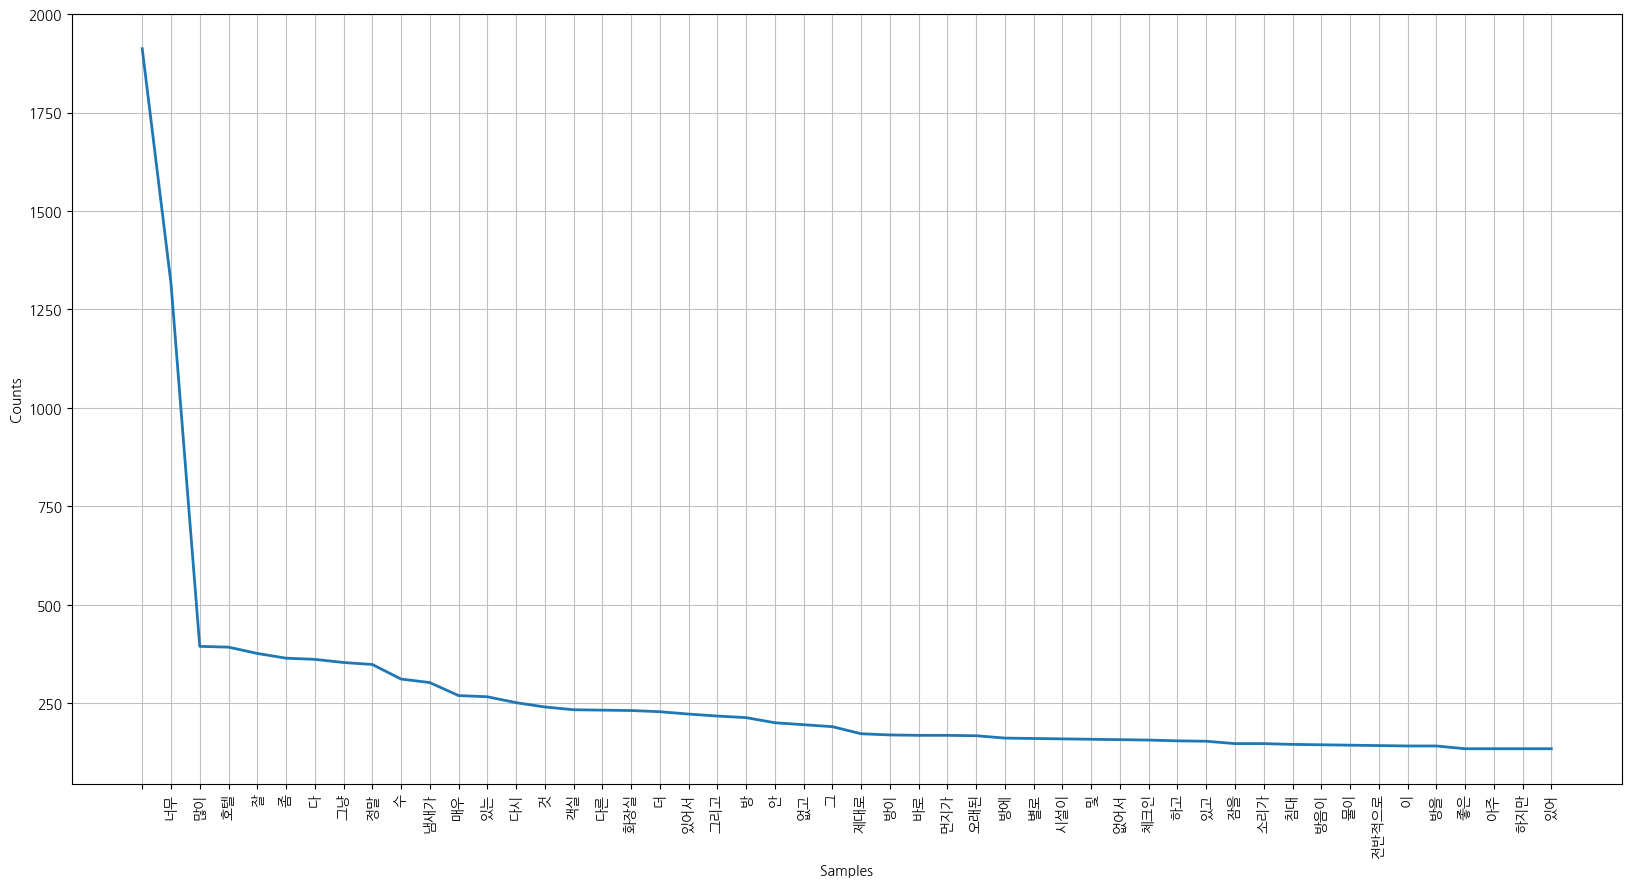

In [59]:
plt.figure(figsize = (20, 10))
FreqDist(four_words).plot(50)

In [22]:
X = data['description']
y = data['evaluation']

### 형태소 분리 안한 거

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

카운터벡터라이즈

In [24]:
cv = CountVectorizer(max_df = 0.8, min_df = 3, ngram_range = (1,2))
X_cv = cv.fit_transform(X)
# X_cv = cv.transform(X)

In [25]:
X_cv_train, X_cv_valid, y_cv_train_, y_cv_valid = train_test_split(X_cv, y, test_size = 0.4, random_state = 7)
X_cv_valid, X_cv_test, y_cv_valid, y_cv_test = train_test_split(X_cv_valid, y_cv_valid, test_size = 0.5, random_state = 7)

In [26]:
mnb = MultinomialNB()
mnb.fit(X_cv_train, y_cv_train_)
pred_cv = mnb.predict(X_cv_valid)
print(accuracy_score(y_cv_valid, pred_cv))
print(classification_report(y_cv_valid, pred_cv))

0.8634
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      3321
           1       0.92      0.91      0.91     11679

    accuracy                           0.86     15000
   macro avg       0.80      0.81      0.80     15000
weighted avg       0.87      0.86      0.86     15000



In [27]:
pred_cv = mnb.predict(X_cv_test)
print(accuracy_score(y_cv_test, pred_cv))
print(classification_report(y_cv_test, pred_cv))

0.8634
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      3308
           1       0.92      0.91      0.91     11692

    accuracy                           0.86     15000
   macro avg       0.80      0.81      0.80     15000
weighted avg       0.87      0.86      0.86     15000



tfidf벡터라이즈

In [28]:
tv = TfidfVectorizer(max_df = 0.8, min_df = 3, ngram_range = (1,2))
X_tv = tv.fit_transform(X)
# X_tv = tv.transform(X)

In [29]:
X_tv_train, X_tv_valid, y_tv_train_, y_tv_valid = train_test_split(X_tv, y, test_size = 0.4, random_state = 7)
X_tv_valid, X_tv_test, y_tv_valid, y_tv_test = train_test_split(X_tv_valid, y_tv_valid, test_size = 0.5, random_state = 7)

In [30]:
mnb = MultinomialNB()
mnb.fit(X_tv_train, y_tv_train_)
pred_tv = mnb.predict(X_tv_valid)
print(accuracy_score(y_tv_valid, pred_tv))
print(classification_report(y_tv_valid, pred_tv))

0.8384666666666667
              precision    recall  f1-score   support

           0       0.88      0.31      0.46      3321
           1       0.83      0.99      0.91     11679

    accuracy                           0.84     15000
   macro avg       0.86      0.65      0.68     15000
weighted avg       0.85      0.84      0.81     15000



In [31]:
pred_tv = mnb.predict(X_tv_test)
print(accuracy_score(y_tv_test, pred_tv))
print(classification_report(y_tv_test, pred_tv))

0.8373333333333334
              precision    recall  f1-score   support

           0       0.88      0.31      0.45      3308
           1       0.83      0.99      0.90     11692

    accuracy                           0.84     15000
   macro avg       0.85      0.65      0.68     15000
weighted avg       0.84      0.84      0.80     15000



In [32]:
from konlpy.tag import Mecab
mecab = Mecab()

In [33]:
def tokenizer(text) :
    tokens = mecab.morphs(text)
    return tokens

In [34]:
def remove_stopwords(x) :
    cleaned = []
    for i in x :
        if i not in list(stopwords[0]) :
            cleaned.append(i)
    cleaned = ' '.join(cleaned)
    return cleaned

In [35]:
X = X.apply(tokenizer)

In [36]:
X = X.apply(remove_stopwords)

In [37]:
print(type(X))
print(type(X[0]))

<class 'pandas.core.series.Series'>
<class 'str'>


In [38]:
cv = CountVectorizer(max_df = 0.8, min_df = 3, ngram_range = (1,2))
X_cv = cv.fit_transform(X)
# X_cv = cv.transform(X)
X_cv_train, X_cv_valid, y_cv_train_, y_cv_valid = train_test_split(X_cv, y, test_size = 0.4, random_state = 7)
X_cv_valid, X_cv_test, y_cv_valid, y_cv_test = train_test_split(X_cv_valid, y_cv_valid, test_size = 0.5, random_state = 7)
mnb = MultinomialNB()
mnb.fit(X_cv_train, y_cv_train_)
pred_cv = mnb.predict(X_cv_valid)
print(accuracy_score(y_cv_valid, pred_cv))
print(classification_report(y_cv_valid, pred_cv))

0.8624
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      3321
           1       0.91      0.91      0.91     11679

    accuracy                           0.86     15000
   macro avg       0.80      0.80      0.80     15000
weighted avg       0.86      0.86      0.86     15000



In [39]:
pred_cv = mnb.predict(X_cv_test)
print(accuracy_score(y_cv_test, pred_cv))
print(classification_report(y_cv_test, pred_cv))

0.8652666666666666
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      3308
           1       0.92      0.91      0.91     11692

    accuracy                           0.87     15000
   macro avg       0.80      0.81      0.81     15000
weighted avg       0.87      0.87      0.87     15000



TFIDF벡터라이즈

In [40]:
tv = TfidfVectorizer(max_df = 0.8, min_df = 3, ngram_range = (1,2))
X_tv = tv.fit_transform(X)
# X_tv = tv.transform(X)
X_tv_train, X_tv_valid, y_tv_train_, y_tv_valid = train_test_split(X_tv, y, test_size = 0.4, random_state = 7)
X_tv_valid, X_tv_test, y_tv_valid, y_tv_test = train_test_split(X_tv_valid, y_tv_valid, test_size = 0.5, random_state = 7)
mnb = MultinomialNB()
mnb.fit(X_tv_train, y_tv_train_)
pred_tv = mnb.predict(X_tv_valid)
print(accuracy_score(y_tv_valid, pred_tv))
print(classification_report(y_tv_valid, pred_tv))

0.8396666666666667
              precision    recall  f1-score   support

           0       0.89      0.32      0.47      3321
           1       0.84      0.99      0.91     11679

    accuracy                           0.84     15000
   macro avg       0.86      0.65      0.69     15000
weighted avg       0.85      0.84      0.81     15000



In [41]:
pred_tv = mnb.predict(X_tv_test)
print(accuracy_score(y_tv_test, pred_tv))
print(classification_report(y_tv_test, pred_tv))

0.8396
              precision    recall  f1-score   support

           0       0.87      0.32      0.47      3308
           1       0.84      0.99      0.91     11692

    accuracy                           0.84     15000
   macro avg       0.85      0.65      0.69     15000
weighted avg       0.84      0.84      0.81     15000



In [79]:
X

0        직원 서비스 마인드 완벽 합니다 다만 노후 된 시설 과 좁 라운지 호텔 이름 에 비...
1        웨스틴 조선 모든 면 에서 최고 의 숙소 라고 합니다 분위기 편의 성 직원 친절 도...
2        서울 시내 에서 호 캉 스 를 누릴 는 곳 아침 뷔페 맛있 는 곳 룸서비스 았 음 ...
3                                        가격 에 맞 게 만족 했 습니다
4        처음 세 으로 셋 팅 어 빼 고 는 직원 의 친절 도 및 서비스 는 모두 맘 에 었...
                               ...                        
74995    조식 과 스탠더드 하프 전망 신청 해서 1 박 했 는데요 ᆢ너무 아요 ᆢ다만 가격 ...
74996    객실 깔끔 고 에메 니티 도 딱 필요 만큼 었 습니다 5 분 거리 에 중앙 시장 어...
74997       배드 고 조용 해서 았 습니다 찬바람 들어와서 난방기 를 12 돌려야 따뜻 해집니다
74998    우선 위치 너무 았 고 숙소 에 짐 을 고 걸어서 주변 볼 곳 도 고 먹거리 도 맛...
74999    주차장 부족 해서 에 주차 했 는데 아침 에 이동 달 라는 전화 와서 다소 불쾌 했...
Name: description, Length: 75000, dtype: object